<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
data_hh = pd.read_csv('data\dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [ ]:
display(data_hh.head())
display(data_hh.tail())

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [ ]:
display(data_hh.info())

5. Выведите основную статистическую информацию о столбцах.


In [ ]:
data_hh.describe(include=['object'])

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [3]:
#Преобразуем признак 'Образование и ВУЗ' и приводим к типу 'category'
data_hh['Образование'] = data_hh['Образование и ВУЗ'].apply(
    lambda x: ' '.join(x.split()[:2]) if 'образование' not in x.split()[:2] else ' '.join(x.split()[:1])
)

data_hh['Образование'] = data_hh['Образование'].astype('category')

#Код для ответа на вопрос из задания
display(data_hh['Образование'].value_counts())

#Удаляем признак 'Образование и ВУЗ' из данных
data_hh = data_hh.drop(['Образование и ВУЗ'], axis=1)

Высшее                 33863
Среднее специальное     5765
Неоконченное высшее     4557
Среднее                  559
Name: Образование, dtype: int64

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [4]:
#Преобразуем признак 'Пол, Возраст' в категорийный признак 'Пол'
data_hh['Пол'] = data_hh['Пол, возраст'].apply(lambda x: 'М' if x.split(sep=' , ')[0]=='Мужчина' else 'Ж')
data_hh['Пол'] = data_hh['Пол'].astype('category')

#Преобразуем признак 'Пол, Возраст' в целочисленный признак 'Возраст'
data_hh['Возраст'] = data_hh['Пол, возраст'].apply(lambda x: (x.split(sep=' , ')[1]).split()[0])
data_hh['Возраст'] = data_hh['Возраст'].astype('int')

#Вычисляем процент представленных женских резюме
display(data_hh['Пол'].value_counts(normalize=True)*100)

#Высчиляем средний возраст кандидатов
mean_age = data_hh['Возраст'].mean()
display(f'Cредний возраст кандидатов: {mean_age}')

#Удаляем признак 'Пол, возраст' из данных
data_hh = data_hh.drop(['Пол, возраст'], axis=1)

М    80.929287
Ж    19.070713
Name: Пол, dtype: float64

'Cредний возраст кандидатов: 32.19674146254246'

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [5]:
#В первый шаг получаем список строк описывающих только опыт работы
#или NaN для пропусков и значений 'Не указано'
data_hh['Опыт работы (месяц)'] = data_hh['Опыт работы'].apply(
    lambda x: np.nan if (pd.isnull(x) or x=='Не указано') else (x.split(sep='  ')[0]).split()[2:]
)

#Создаем маску для фильтрации NaN значений
mask=data_hh['Опыт работы (месяц)'].isnull()

#Высчитываем количество месяцев для каждого значения признака (за исключением NaN)
data_hh['Опыт работы (месяц)'] = data_hh['Опыт работы (месяц)'][~mask].apply(
    lambda x: 12*int(x[0])+int(x[2]) if len(x)==4 else (
        int(x[0]) if x[1][0]=='м' else 12*int(x[0])
    )
)

#Высчитываем медианный опыт работы
median_age = data_hh['Опыт работы (месяц)'].median()
display(f'Медианный опыт работы: {median_age}')

#Удаляем признак 'Опыт работы' из данных
data_hh = data_hh.drop(['Опыт работы'], axis=1)


'Медианный опыт работы: 100.0'

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [6]:
#Создадим временный признак '-метро' и исключим названия метро из признака 'Город, переезд, командировки'
#Определим функцию для удаления названия метро
def remove_metro(city_move_btrip):
    lst_arg = city_move_btrip.split(sep=' , ')
    if 'м.' in lst_arg[1]:
        del lst_arg[1]
        return lst_arg
    else:
        return lst_arg

#Удалим названия метро применив функцию
data_hh['-метро'] = data_hh['Город, переезд, командировки'].apply(remove_metro)

#В идеальном случае длина всех списков должна быть равна 3, убедимся в этом
data_hh['Temp'] = data_hh['-метро'].apply(lambda x: len(x))
display(data_hh['Temp'].value_counts())

#Заметим наблюдения длин списков равным 2 и 4, убедимся что они не помешают дальнейшему анализу
#для этого выведем показательные элементы
mask1 = data_hh['Temp']==2
display(data_hh[mask1].loc[901, '-метро'])

mask2 = data_hh['Temp']==4
display(data_hh[mask2].loc[17787, '-метро'])

#Удалим лишний элемент для наблюдения длины списка равного 4
#Элементы с длиной списка равной 2 не помешают дальнейшему анализу
misc=(data_hh[mask2].loc[17787, '-метро']).pop(2)

#Удалим временный признак 'Test' из данных
data_hh = data_hh.drop(['Temp'], axis=1)


3    44673
2       70
4        1
Name: Temp, dtype: int64

['Москва',
 'готов к переезду (Москва, Астраханская область, Санкт-Петербург, Екатеринбург, Калужская область, Московская область, Брянская область, Ставропольский край, Ярославская область, Смоленская область, Ленинградская область, Самарск']

['Санкт-Петербург',
 'готов к переезду (Павловск (Ленинградская область), Пушкин (Ленинградская область)',
 'Колпино)',
 'не готов к командировкам']

In [7]:
#Первый шаг: распределяем кандидатов по признаку 'Город'
data_hh['Город'] = data_hh['-метро'].apply(
    lambda x: x[0]
)

#Список городов-миллионников из задания
million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 
                  'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 
                  'Красноярск', 'Пермь', 'Воронеж','Волгоград']

#Группируем кандидатов по признаку 'Город' в указанные категории 
data_hh['Город'] = data_hh['Город'].apply(
    lambda x: x if x=='Москва' or x=='Санкт-Петербург' else
    ('город-миллионник' if x in million_cities else 'другие')
)

#Приводим к типу 'category'
data_hh['Город'] = data_hh['Город'].astype('category')

#Вычисляем процент соискателей из города Санкт-Петербург
display(data_hh['Город'].value_counts(normalize=True)*100)

#Создаем признак готовности к переезду
data_hh['Готовность к переезду'] = data_hh['-метро'].apply(
    lambda x: True if x[1].find('не')==-1 else False
)

#Создаем признак готовности к командировкам
data_hh['Готовность к командировкам'] = data_hh['-метро'].apply(
    lambda x: False if len(x)==2 else 
    (True if x[2].find('не')==-1 else False)
)

#Высчитываем процент соискателей одновременно готовым к переезду и к командировкам
c1 = data_hh[(data_hh['Готовность к переезду']) & (data_hh['Готовность к командировкам'])]['Город'].count()
c2 = data_hh['Город'].count()
print(f'Процент соискателей одновременно готовым к переезду и к командировкам: {c1/c2*100}')

#Удаляем временный признак '-метро' и оригинальный признак 'Город, переезд, командировки'
data_hh = data_hh.drop(['-метро', 'Город, переезд, командировки'], axis=1)


Москва              37.146880
другие              35.432684
город-миллионник    16.386555
Санкт-Петербург     11.033882
Name: Город, dtype: float64

Процент соискателей одновременно готовым к переезду и к командировкам: 31.62882174146254


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [8]:
#Добавляем признаки мигалки по признаку 'Занятость'
data_hh['полная занятость'] = data_hh['Занятость'].apply(
    lambda x: False if x.find('полная занятость')==-1 else True
)

data_hh['частичная занятость'] = data_hh['Занятость'].apply(
    lambda x: False if x.find('частичная занятость')==-1 else True
)

data_hh['стажировка'] = data_hh['Занятость'].apply(
    lambda x: False if x.find('стажировка')==-1 else True
)

data_hh['проектная работа'] = data_hh['Занятость'].apply(
    lambda x: False if x.find('проектная работа')==-1 else True
)

data_hh['волонтерство'] = data_hh['Занятость'].apply(
    lambda x: False if x.find('волонтерство')==-1 else True
)

#Добавляем признаки мигалки по признаку 'График'
data_hh['полный день'] = data_hh['График'].apply(
    lambda x: False if x.find('полный день')==-1 else True
)

data_hh['сменный график'] = data_hh['График'].apply(
    lambda x: False if x.find('сменный график')==-1 else True
)

data_hh['гибкий график'] = data_hh['График'].apply(
    lambda x: False if x.find('гибкий график')==-1 else True
)

data_hh['удаленная работа'] = data_hh['График'].apply(
    lambda x: False if x.find('удаленная работа')==-1 else True
)

data_hh['вахтовый метод'] = data_hh['График'].apply(
    lambda x: False if x.find('вахтовый метод')==-1 else True
)

#Вычислим количество людей ищущих проектную работу и волонтёрство
count1 = data_hh[data_hh['проектная работа'] & data_hh['волонтерство']]['проектная работа'].count()
display(f'Количество кандидатов ищущих проектную работу и волонтёрство: {count1}')

#Вычислим количество людей ищущих работу вахтовым методом и с гибким графиком
count2 = data_hh[data_hh['вахтовый метод'] & data_hh['гибкий график']]['вахтовый метод'].count()
display(f'Количество кандидатов ищущих работу вахтовым методом и с гибким графиком: {count2}')

#Удалим признаки 'Занятость' и 'График'
data_hh = data_hh.drop(['Занятость', 'График'], axis=1)

'Количество кандидатов ищущих проектную работу и волонтёрство: 436'

'Количество кандидатов ищущих работу вахтовым методом и с гибким графиком: 2311'

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [9]:
#Считываем данные из файла с курсами валют
data_currency = pd.read_csv('data\ExchangeRates.csv', sep=',')

#Переводим признаки даты в формат datetime и выделяем дату
data_hh['Обновление резюме'] = pd.to_datetime(data_hh['Обновление резюме'], dayfirst=True).dt.date
data_currency['date'] = pd.to_datetime(data_currency['date'], dayfirst=True).dt.date

#Разбиваем признак 'ЗП' на количество и валюту
data_hh['Amount'] = data_hh['ЗП'].apply(lambda x: float(x.split()[0]))
data_hh['Currency'] = data_hh['ЗП'].apply(lambda x: x.split()[1])

#Приводим названия валют к стандарту ISO
name_hh = list(data_hh['Currency'].value_counts().index)
name_currency = ['RUB', 'KZT', 'USD', 'BYN', 'EUR', 'UAH', 'UZS', 'KGS', 'AZN']
data_hh['Currency'] = data_hh['Currency'].apply(
    lambda x: name_currency[name_hh.index(x)]
)

#Объеденяем данные по датам и названиям валют
data_merged = data_hh.merge(
    right=data_currency, how='left', left_on=['Обновление резюме', 'Currency'], right_on=['date', 'currency']
)

#Заполняем признаки 'proportion' и 'close' для валюты 'RUB' значением 1
data_merged['proportion'] = data_merged['proportion'].apply(
    lambda x: 1 if pd.isnull(x) else x
)
data_merged['close'] = data_merged['close'].apply(
    lambda x: 1 if pd.isnull(x) else x
)

#Создаем признак желаемой валюты в рублях
data_merged['ЗП (руб)'] = data_merged['Amount']*data_merged['close']/data_merged['proportion']

#Высчитаем желаемую медианную заработную плату соискателей в таблице (в рублях)
sal_med = data_merged['ЗП (руб)'].median()
display(f'Желаемая медианная заработная плата соискателей: {sal_med}')

#Удаляем лишние столбцы из таблицы
data_merged = data_merged.drop(
    ['ЗП', 'Amount', 'Currency', 'currency', 'per',
     'date', 'time', 'close', 'vol', 'proportion'], 
    axis=1
)

'Желаемая медианная заработная плата соискателей: 59019.0'

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [ ]:
#Построим распределение признака 'Возраст'
fig1, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
fig1.suptitle('Распределение Возраста Соискателей', fontsize=16)

sns.histplot(
    data=data_merged,
    x='Возраст',
    binwidth=5,
    binrange=[0,100],
    kde=True,
    ax=ax1[0]
)
ax1[0].set_xlabel('Возраст')
ax1[0].set_ylabel('Количество кандидатов')
ax1[0].set_xticks(range(0,101,5))

sns.boxplot(
    data=data_merged,
    x='Возраст',
    orient='h',
    width=0.6,
    ax=ax1[1]
)
ax1[1].set_xlabel('Возраст')
ax1[1].set_xticks(range(0,101,5))
ax1[1].grid()

#Вычислим моду распределения признака 'Возраст'
mode1 = data_merged['Возраст'].mode()[0]
display(f'Мода распределения: {mode1}')

Мода распределения возраста соискателей равна 30 годам. На коробчатой диаграмме распределения видны предельные значения возраста соискателей в диапазоне от 15 до 50 лет. Свыше 50 лет наблюдается некоторое количество потенциальных выбросовб так например возраст кандидата в 100 лет может указывать на ошибку в формировании данных. Из гистаграммы и межквартильного размаха коробчатой диаграммы можно сделать вывод что наиболее часто ищут работу кандидаты в возрасте 25-35 лет. В период с 20 лет наблюдается резкий подъем количества соискателей, в то время как после 35 наблюдается плавный спад.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [ ]:
#Построим распределение признака возраст
fig2, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
fig2.suptitle('Распределение Опыта Работы Соискателей', fontsize=16)

sns.histplot(
    data=data_merged,
    x='Опыт работы (месяц)',
    binwidth=50,
    binrange=[0,1200],
    kde=True,
    ax=ax2[0]
)
ax2[0].set_xlabel('Опыт Работы (месяц)')
ax2[0].set_ylabel('Количество кандидатов')
ax2[0].set_xticks(range(0,1201,100))

sns.boxplot(
    data=data_merged,
    x='Опыт работы (месяц)',
    orient='h',
    width=0.6,
    ax=ax2[1]
)
ax2[1].set_xlabel('Опыт Работы (месяц)')
ax2[1].set_xticks(range(0,1201,100))
ax2[1].grid()

#Вычислим моду распределения признака 'Опыт Работы (месяц)'
mode2 = data_merged['Опыт работы (месяц)'].mode()[0]
display(f'Мода распределения: {mode2}')

Мода распределения равна 81 месяцу опыта работы. Из коробчатой диаграммы распреределения прослеживается медианное значение близкое к отметке в 100 месяцов опыта работы. Межквртильный размах указывает на то, что большинство соискателей имеют опыт работы в диапазоне 50 - 150 месяцев. Нижний предел опыта работы соответсвует остутсвию опыта, а верхний предел располагается на отметке в 300 месяцев опыта работы. На коробчатой диаграмме также наблюдаются выбросы в диапазоне более 300 месяцев опыта работы. Некоторые из них указывают на явно аномальные значения, например опыт работы в 1200 соответсвует опыту работы в 100 лет, что являетяется крайне маловероятным в обычных условиях. В целом распределение достаточно равномерное и имеет логнормальную форму.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


'Количство соискателей ищущих заработную плату cвыше 1 миллиона рублей: 44574'

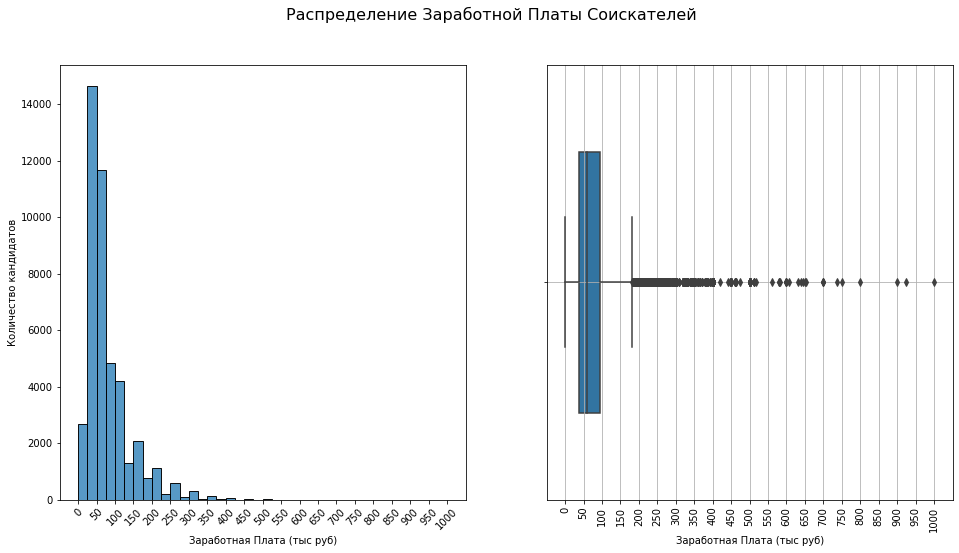

In [10]:
#Создадим маску для фильтрации значений заработных плат превышающих миллион рублей
#Изменим признак 'ЗП (руб)' для отображения зарплаты в тысячах руб
mask3 = data_merged['ЗП (руб)']<=1e6
data_merged['ЗП (тыс руб)'] = data_merged['ЗП (руб)'].apply(lambda x: x/1000)

#Определим количство соискателей требующих заработную плату cвыше 1 миллиона рублей
count3 = data_merged[~mask]['ЗП (руб)'].count()
display(f'Количство соискателей ищущих заработную плату cвыше 1 миллиона рублей: {count3}')

#Построим распределение признака возраст
fig3, ax3 = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
fig3.suptitle('Распределение Заработной Платы Соискателей', fontsize=16)

sns.histplot(
    data=data_merged[mask3],
    x='ЗП (тыс руб)',
    binwidth=25,
    binrange=[0,1000],
    ax=ax3[0]
)
ax3[0].set_xlabel('Заработная Плата (тыс руб)')
ax3[0].set_ylabel('Количество кандидатов')
ax3[0].set_xticks(range(0,1001,50))
ax3[0].tick_params(axis='x', labelrotation=45)

sns.boxplot(
    data=data_merged[mask3],
    x='ЗП (тыс руб)',
    orient='h',
    width=0.6,
    ax=ax3[1]
)
ax3[1].set_xlabel('Заработная Плата (тыс руб)')
ax3[1].set_xticks(range(0,1001,50))
ax3[1].tick_params(axis='x', labelrotation=90)
ax3[1].grid();

Из коробчатой диаграммы можно определить предельные значения желаемой заработной платы соискателей от 0 до 180 тысяч рублей. Большинство соискателей ищут работу с заработной платой в диапазоне от 40 до 100 тысяч рублей. Также в данных присутсвуют аномальные значения с желаемыми заработными платами в 100-и миллионов или даже несколько миллиардов рублей (которые были отфильтрованы до 1 миллиона рублей, так как вероятно являются результатом ошибки в заполнении данных). Из гистограммы можно подчеркнуть логнормальную форму распределния, однако наблюдается определнная степень неравномерности в диапазоне желаемых заработных плат от 100 тысяч и выше. Здесь достаточно точно прослеживаются переменный характер подъемов и спадов в количестве людей ищущих вакансии с данными заработными платами.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [ ]:
#Создадим маску для фильтрации соискателей с желаемым уровнем ЗП больше миллиона
mask4 = data_merged['ЗП (руб)']<=1e6

#Отфильтруем данные и сгруппируем по признаку 'Образование'
#Высчитаем медианное значение желаемой заработной платы
data_plt4 = data_merged[mask4].groupby(by='Образование', as_index=False)['ЗП (руб)'].median()

#Построим график распределения
fig4 = plt.figure(figsize=(7,7))
ax4 = fig4.add_axes([0,0,1,1])
sns.barplot(
    data=data_plt4,
    x='Образование',
    y='ЗП (руб)',
    orient='v',
    ax=ax4
)

ax4.set_title('Зависимость Медианной Заработной Платы от Образования')
ax4.set_xlabel('Уровень образование')
ax4.set_ylabel('Медианная ЗП (руб)')
ax4.grid(axis='y');

Наибольший уровень желаемой заработной платы ожидается для кандидатов с высшим образование, в то время время как наименьший для кандидатов со средним и средне специальным уровнями образования. При прогнозировании уровня желаемой заработной платы фактор образования являяется важным, так как среди кандидатов наблюдается разброс в 20 тысяч рублей по показателю медианной заработной платы. 

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [ ]:
#Отфильтруем соискателей с желаемым уровнем ЗП больше миллиона
mask5 = data_merged['ЗП (руб)']<1e6
data_mod5 = data_merged[mask5]

#Построим график распределения
fig5 = plt.figure(figsize=(10,5))
ax5 = fig5.add_axes([0,0,1,1])

sns.boxplot(
    data=data_mod5,
    x='ЗП (тыс руб)',
    y='Город',
    width=0.6,
    ax=ax5
)
ax5.set_title('Зависимость Желаемой Заработной Платы от Города')
ax5.set_xlabel('Желаемая ЗП (тыс руб)')
ax5.set_xticks(range(0, 1001, 50))
ax5.set_ylabel('Город')
ax5.grid(axis='x');

Наибольший показатель медианной заработной платы зафиксирован в Москве и близок к 85 тысячам рублей. Данный показатель в городе Санкт-Петербурге приблизительно на четверть ниже и составляет 60 тысяч рублей. Показатель в городах-миллиониках равен показателю в других городах и составляет 40 тысяч рублей. Также следует заметить, что размах заработной платы в Москве наибольший и составляет 90 тысяч рублей. Следующие по величине размаха: город Санкт-Петербург, города-миллионники и другие города, здесь показатель размаха лежит в приблизительно равном диапазоне и составляет половину от Московсого. В целом, в то время как для прогнозирования заработной платы для соискателей из крупнейших городов России признак города необходимо учитывать, в городах-миллиониках и остальных городах России им можно пренебречь.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [ ]:
#Создадим новый датафрейм группируя по показателяем готовности к переезду/командировкам
#вычислив медианную ЗП в тысячах рублей для каждой из групп
data_plt6 = data_merged.groupby(
    ['Готовность к переезду', 'Готовность к командировкам'], as_index=False)['ЗП (тыс руб)'].median()

#Построим многоуровневую столбчатую диаграмму
fig6 = plt.figure(figsize=(8,8))
ax6 = fig6.add_axes([0,0,1,1])
sns.barplot(
    data=data_plt6,
    x='Готовность к переезду',
    y='ЗП (тыс руб)',
    hue='Готовность к командировкам',
    ax=ax6
)
ax6.set_title('Зависимость Медианной Заработной Платы от Готовности к Переездам/Командировкам')
ax6.set_ylabel('Медианная ЗП (тыс руб)')
ax6.set_yticks(range(0, 71, 5))
ax6.grid(axis='y');

Самый высокий уровень медианной заработной платы в категории соискателей готовым к переездам, командировкам и составляет 66 тысяч рублей. Следующая по величине данного показателя категория соискателей не готовым к переездам, но готовым к командировкам - 60 тысяч рублей. Категория кандидатов готовым к переезду, но не готовым к командировкам следующая в списке с медианной заработной платой в 50 тысяч рублей. И наименьший уровень медианной заработной платы замечен у категории людей не готовым к переезду и командировкам - 40 тысяч рублей. Вероятным выводом является, что более мобильные кандидаты ожидают более высокую заработную плату. Также примечательно, что показатель готовности к командировкам перевешивает готовность к переезду. Как заметно из графика у людей готовых только к командировкам медианная заработная плата на 10 тысяч выше, чем у группы соискателей готовых только к переезду.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [ ]:
#Построим сводную таблицу по данным признакам
pivot_table7 = data_merged.pivot_table(
    values='ЗП (тыс руб)', index='Образование', columns='Возраст', aggfunc='median')

#Построим тепловую карту по данной таблице
fig7 = plt.figure(figsize=(8,6))
ax7 = fig7.add_axes([0,0,1,1])

sns.heatmap(data=pivot_table7, cmap='YlGnBu', center=50, ax=ax7, cbar_kws={'label': 'ЗП (тыс руб)'})
ax7.set_title('Зависимость Медианной ЗП от Образования и Возраста');

Из графика видно, что в целом в любом возрасте с лучшим уровнем образования медианная заработная плата растет. За исключением группы до 25 лет со средним образованием, где местами заметен более высокий показатель медианной заработной платы в сравнении с другими группами. Примечательно наличие соискателей с высшим образованием в возрасте 15-18 лет. Также можно наблюдать равномерный рост заработной платы с возрастом в каждой из категорий уровня образования. В целом с высшим образованием соискатели показывают более скорый темп увеличения медианной заработной платы с возрастом. Наличие пустых пятен с 60 летнего возраста вероятно обусловлено выходом потенциальных соискателей на пенсию, и заметно что люди с высшим и средне специальным образованием в целом продолжают искать работу до более приклонных лет.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [ ]:
#Переведем признак опыта работы в годы создав новый признак
data_merged['Опыт работы (годы)'] = data_merged['Опыт работы (месяц)'].apply(
    lambda x: x/12
)

#Построим диаграмму рассеяния
fig8 = plt.figure(figsize=(6,5))
ax8 = fig8.add_axes([0,0,1,1])

sns.scatterplot(
    data=data_merged,
    x='Возраст',
    y='Опыт работы (годы)',
    ax=ax8
)

ax8.plot([0, 100], [0, 100], 'k-')
ax8.set_title('Зависимость Опыта Работы от Возраста')
ax8.set_yticks(range(0,101,5))
ax8.set_xticks(range(0,101,5))
ax8.grid()

#Проведем фильтрацию для ответа на вопрос из задания
mask81 = data_merged['Опыт работы (годы)']>data_merged['Возраст']
count8 = data_merged[mask81]['Возраст'].count()
display(f'Количество аномальных показателей: {count8}')

Было найдено 7 аномальных показателей соотношения опыта работы и возраста, где опыт работы превышает возраст. Также существуют соотношения под вопросом близкие к линии соотношения Возраст-Опыт 1:1, а именно 20:15, 25:20, 28:23 (опыт работы с 5 лет). В целом заметен кластер указывающий на диапазон соотношения Возраст-Опыт. 

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


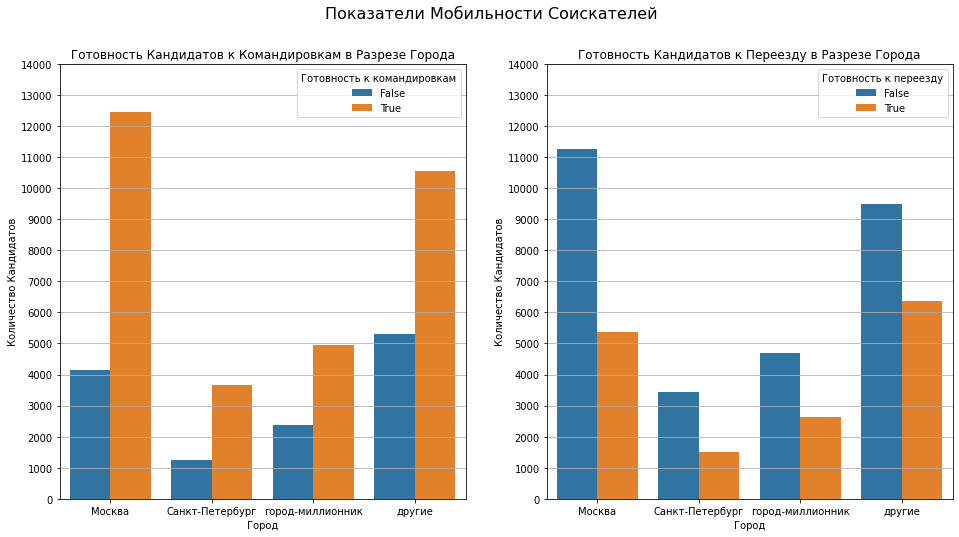

In [104]:
#Создадим новые датафреймы группируя по признаку город
#вычислив колличество соисквателей готовых (нет) к переездам/командировкам
data9_btrip = data_merged.groupby(
    ['Город'], as_index=False)[['Готовность к командировкам']].value_counts()

data9_move = data_merged.groupby(
    ['Город'], as_index=False)[['Готовность к переезду']].value_counts()

#Построим многоуровневые столбчатые диаграммы для двух новых датафреймов
#для удобства объединим обе диаграммы в один график
fig9, ax9 = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
fig9.suptitle('Показатели Мобильности Соискателей', fontsize=16)

sns.barplot(
    data=data9_btrip,
    x='Город',
    y='count',
    hue='Готовность к командировкам',
    ax=ax9[0]
)
ax9[0].set_title('Готовность Кандидатов к Командировкам в Разрезе Города')
ax9[0].set_ylabel('Количество Кандидатов')
ax9[0].set_yticks(range(0, 14001, 1000))
ax9[0].grid(axis='y')

sns.barplot(
    data=data9_move,
    x='Город',
    y='count',
    hue='Готовность к переезду',
    ax=ax9[1]
)
ax9[1].set_title('Готовность Кандидатов к Переезду в Разрезе Города')
ax9[1].set_ylabel('Количество Кандидатов')
ax9[1].set_yticks(range(0, 14001, 1000))
ax9[1].grid(axis='y');

Выводы по графику готовности кандидатов к командировкам:
В целом большинство кандидатов готово к командировкам. В частности около 3/4 кандидатов из Москвы и Санкт-Петербурга готовы к командировкам. В сравнении с кандидатами из городов-миллионников и других городов, где 2/3 соискателей готовы к командировкам, данные указывают на большую временную мобильность соискателей из центральных городов.

Выводы по графику готовности кандидатов к переезду:
В целом большинство кандидатов не готово к переезду. Из больших городов (Москва, Санкт-Петербург и городов-миллионников) соискатели стремятся уезжать реже, чем из других городов. Также соискатели из городов-миллионников более склонны к переезду, чем соискатели из Москвы и Санкт-Петербурга.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [63]:
#Найдем количество дубликатов
mask1 = data_merged.duplicated()
data_merged_dup = data_merged[mask1]
display(f'Количество найденых дубликатов: {data_merged_dup.shape[0]}')

#Удалим полные дубликаты из таблицы
data_merged_c1 = data_merged.drop_duplicates()

'Количество найденых дубликатов: 161'

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [65]:
#Получим количество пропусков по колонкам
cols_null_count = data_merged_c1.isnull().sum()
cols_with_null = cols_null_count[cols_null_count>0]
display(cols_with_null)

Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Опыт работы (месяц)                168
Опыт работы (годы)                 168
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [81]:
#Удалим строки
data_merged_c2 = data_merged_c1.copy()
data_merged_c2 = data_merged_c2.dropna(
    how='any', axis=0, subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность']
    )

#Создадим словарь для заполнения пропусков в опыте работы медианным значением
values = {'Опыт работы (месяц)': data_merged_c2['Опыт работы (месяц)'].median(),
          'Опыт работы (годы)': data_merged_c2['Опыт работы (годы)'].median()}

#Заполним пропуски
data_merged_c2 = data_merged_c2.fillna(values)

#Вычислим среднее значение признака 'Опыт работы (месяц)' после преобразования
mean1 = data_merged_c2['Опыт работы (месяц)'].mean()
display(f'Cреднее значение: {mean1}')

'Cреднее значение: 114.35777573405711'

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [85]:
data_merged_c3 = data_merged_c2.copy()

#Отфильтруем интересующие значения
high_sal = data_merged_c3[data_merged_c3['ЗП (руб)']>1e6]
low_sal = data_merged_c3[data_merged_c3['ЗП (руб)']<1000]

#Удалим строки из таблицы
data_merged_c3 = data_merged_c3.drop(high_sal.index, axis=0)
data_merged_c3 = data_merged_c3.drop(low_sal.index, axis=0)

#Ответ на вопрос из задания
display(f'Количество найденных выбросов: {data_merged_c2.shape[0]-data_merged_c3.shape[0]}')

'Количество найденных выбросов: 89'

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [101]:
data_merged_c4 = data_merged_c3.copy()

#Создадим датафрейм с аномальными показателями возраста-опыта работы
mask5 = data_merged_c4['Опыт работы (годы)']>data_merged_c4['Возраст']
age_anomaly = data_merged_c4[mask5]

#Удалим соответсвующие строки из таблицы
data_merged_c4 = data_merged_c4.drop(age_anomaly.index, axis=0)


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [93]:
import math

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,волонтерство,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб),ЗП (тыс руб),Опыт работы (годы),log(Возраст)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,Среднее,М,15,2.0,Санкт-Петербург,...,False,False,True,True,True,False,10000.0,10.0,0.166667,1.176091
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,Среднее специальное,М,15,3.0,другие,...,False,True,False,False,False,False,2000.0,2.0,0.250000,1.176091
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,Среднее специальное,М,100,30.0,Санкт-Петербург,...,False,True,False,True,True,False,60000.0,60.0,2.500000,2.000000


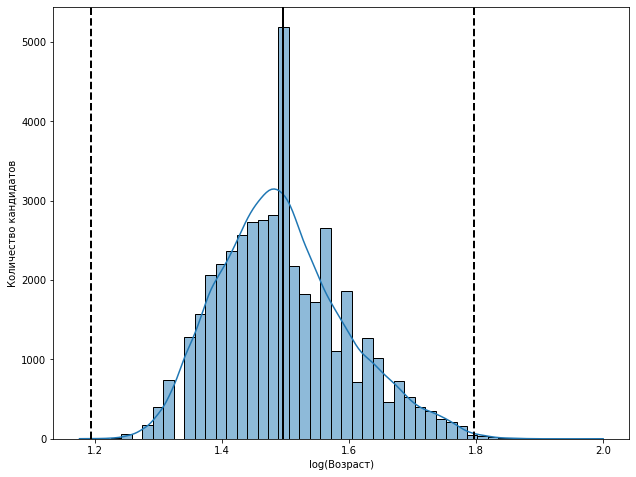

In [103]:
#Создадим новый признак log(Возраст), в котором слогарифмируем признак Возраст
data_merged_c4['log(Возраст)'] = data_merged_c4['Возраст'].apply(
    lambda x: math.log(x, 10)
)

#Построим график распределения признака log(Возраст)
fig11 = plt.figure(figsize=(8,6))
ax11 = fig11.add_axes([0,0,1,1])

sns.histplot(
    data=data_merged_c4,
    x='log(Возраст)',
    bins=50,
    kde=True,
    ax=ax11
)

ax11.set_xlabel('log(Возраст)')
ax11.set_ylabel('Количество кандидатов')

#Вычислим среднее значение и стандартное отклонение распределения
#Добавим линии на график по методу 3-ех сигм
age_mean = data_merged_c4['log(Возраст)'].mean()
age_std = data_merged_c4['log(Возраст)'].std()

ax11.axvline(age_mean, color='k', lw=2)
ax11.axvline(age_mean+3*age_std, color='k', ls='--', lw=2)
ax11.axvline(age_mean-3*age_std, color='k', ls='--', lw=2)

#Отфильтруем выбросы по методу 3-ех сигм
#с послаблением на 1 сигму в правую сторону
mask_out1 = data_merged_c4['log(Возраст)']<(age_mean-3*age_std)
mask_out2 = data_merged_c4['log(Возраст)']>(age_mean+4*age_std)

outliers = data_merged_c4[mask_out1 | mask_out2]
display(outliers)

#Удалим из таблицы найденные выбросы
data_merged_c4 = data_merged_c4.drop(outliers.index, axis=0)


Распределение имеет левую ассиметрию.